In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from constants import Column
from helper_fun import add_covariates
import seaborn as sns

model_name = {
              'salient': 'ctvae-conditional_wasserstein8_fxk3lmiz_salient',
              'background': 'ctvae-conditional_wasserstein8_fxk3lmiz_background',
              }

multivariate = dict()
for key, name in model_name.items():
    multivariate[key] = pd.read_pickle(f'/home/wangz222/scratch/UMAP/{name}.pkl')

In [2]:
perturbed_metadata = pd.read_pickle('/home/wangz222/scratch/splits_shuffled/perturbed_filtered.pkl').reset_index(drop=True)
ntc_metadata = pd.read_pickle('/home/wangz222/scratch/splits_shuffled/ntc_filtered.pkl').reset_index(drop=True)
metadata = pd.concat([perturbed_metadata, ntc_metadata])[::10]

In [3]:
metadata[Column.tile.value] = metadata[Column.tile.value].astype('int64')
metadata = add_covariates(metadata)

center    309541
edge      263113
Name: fov_position, dtype: int64


In [4]:
metadata['sgRNA_0'].reset_index(drop=True).equals(multivariate['salient']['sgRNA_0'].reset_index(drop=True))

True

In [5]:
multivariate['salient'] = pd.concat([multivariate['salient'].reset_index(drop=True), metadata.reset_index(drop=True)], axis=1)
multivariate['background'] = pd.concat([multivariate['background'].reset_index(drop=True), metadata.reset_index(drop=True)], axis=1)

In [6]:
metadata.columns

Index(['plate', 'well', 'tile', 'gene_symbol_0', 'index', 'stage', 'sgRNA_0',
       'cell_i', 'cell_j', 'cell_bounds_0', 'cell_bounds_1', 'cell_bounds_2',
       'cell_bounds_3', 'UID', 'batch', 'fov_position', 'well_position'],
      dtype='object')

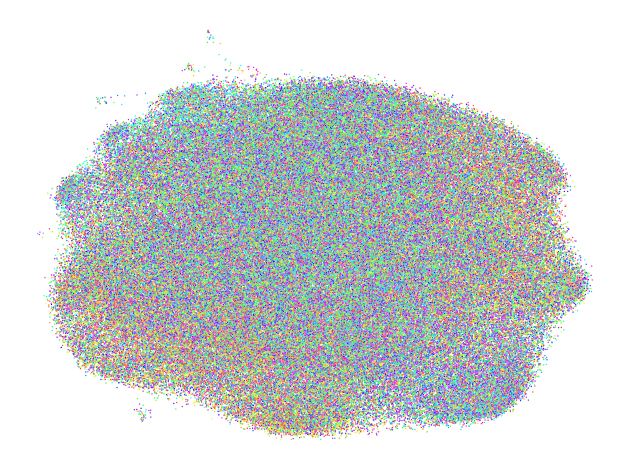

In [48]:
# Create the scatter plot
ax = sns.scatterplot(x='UMAP1', y='UMAP2', hue='batch', data=multivariate['salient'].iloc[::10,:], legend=False, s=1, palette='hsv')

# Remove all axes and ticks
ax.set(xticks=[], yticks=[], xlabel='', ylabel='')

# Set tight layout
plt.tight_layout()

for spine in ax.spines.values():
    spine.set_visible(False)


# Save the figure as SVG
plt.savefig("figure/figure_2/UMAP_batch_salient.png", dpi=300, format="png")

# Display the plot
plt.show()

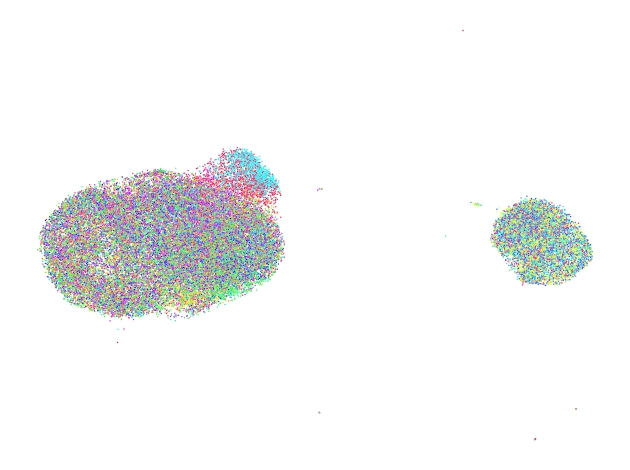

In [49]:
ax = sns.scatterplot(x='UMAP1', y='UMAP2', hue='batch', data=multivariate['background'].iloc[::50,:], legend=False, s=1, palette='hsv')
# Remove all axes and ticks
ax.set(xticks=[], yticks=[], xlabel='', ylabel='')

# Set tight layout
plt.tight_layout()

for spine in ax.spines.values():
    spine.set_visible(False)

# Save the figure as SVG
plt.savefig("figure/figure_2/UMAP_batch_background.png", dpi=300, format="png")

# Display the plot
plt.show()

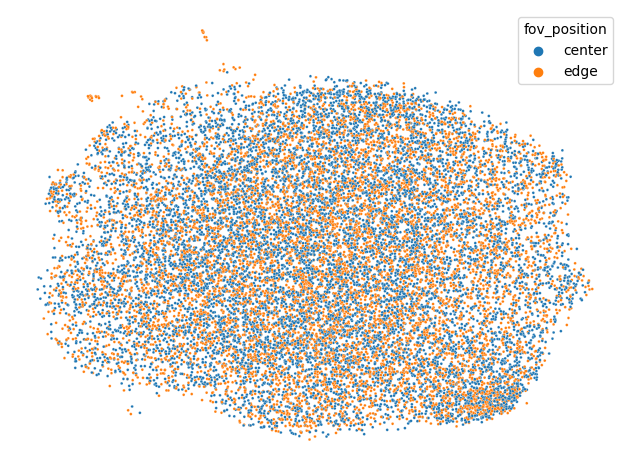

In [23]:
# Create the scatter plot
df = multivariate['salient']
ax = sns.scatterplot(x='UMAP1', y='UMAP2', hue='fov_position', data=df[df['batch']==df['batch'].unique()[1]], s=4)

# Remove all axes and ticks
ax.set(xticks=[], yticks=[], xlabel='', ylabel='')

# Set tight layout
plt.tight_layout()

for spine in ax.spines.values():
    spine.set_visible(False)

# Save the figure as SVG
plt.savefig("figure/figure_2/UMAP_FOV_salient.png", dpi=300, format="png")

# Display the plot
plt.show()

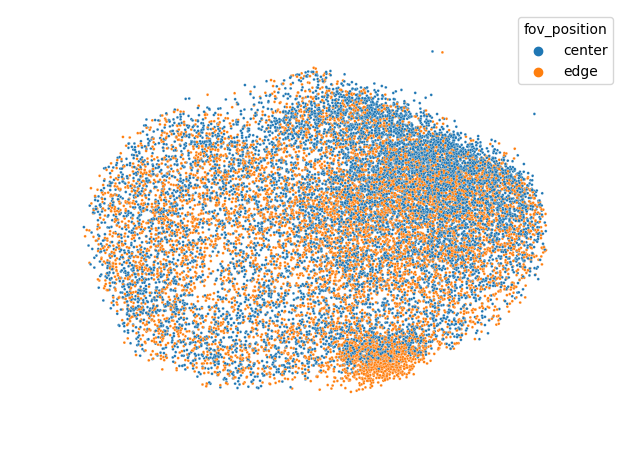

In [22]:
# Create the scatter plot
df = multivariate['background']
ax = sns.scatterplot(x='UMAP1', y='UMAP2', hue='fov_position', data=df[df['batch']==df['batch'].unique()[1]], s=4)

# Remove all axes and ticks
ax.set(xticks=[], yticks=[], xlabel='', ylabel='')
plt.xlim(-7, 4)
plt.ylim(2, 11)

# Set tight layout
plt.tight_layout()

for spine in ax.spines.values():
    spine.set_visible(False)


# Save the figure as SVG
plt.savefig("figure/figure_2/UMAP_FOV_background.png", dpi=300, format="png")

# Display the plot
plt.show()

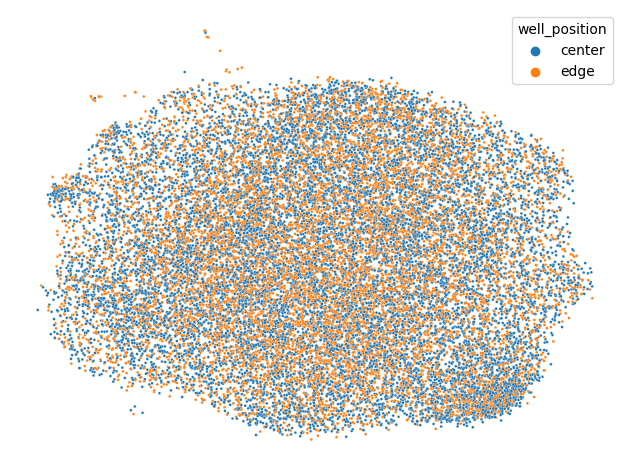

In [21]:
# Create the scatter plot
df = multivariate['salient']
ax = sns.scatterplot(x='UMAP1', y='UMAP2', hue='well_position', data=df[df['batch']==df['batch'].unique()[1]], s=4)

# Remove all axes and ticks
ax.set(xticks=[], yticks=[], xlabel='', ylabel='')
# plt.xlim(-7, 4)
# plt.ylim(2, 11)

# Set tight layout
plt.tight_layout()

for spine in ax.spines.values():
    spine.set_visible(False)


# Save the figure as SVG
plt.savefig("figure/figure_2/UMAP_well_salient.png", dpi=300, format="png")

# Display the plot
plt.show()

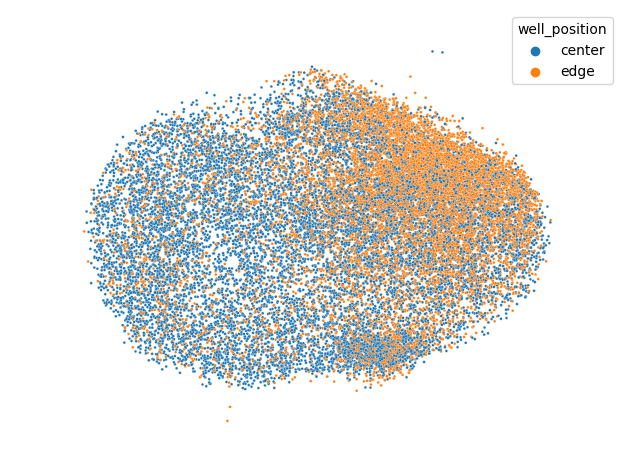

In [20]:
# Create the scatter plot
df = multivariate['background']
ax = sns.scatterplot(x='UMAP1', y='UMAP2', hue='well_position', data=df[df['batch']==df['batch'].unique()[1]], s=4)

# Remove all axes and ticks
ax.set(xticks=[], yticks=[], xlabel='', ylabel='')
plt.xlim(-7, 4)
plt.ylim(2, 11)

# Set tight layout
plt.tight_layout()

for spine in ax.spines.values():
    spine.set_visible(False)


# Save the figure as SVG
plt.savefig("figure/figure_2/UMAP_well_background.png", dpi=300, format="png")

# Display the plot
plt.show()